### Instructions 

This homework is longer than the other ones - take time to get through it all! 

Work through each section and provide a well-commented response in one or more Python cells. I should be able to execute the notebook and obtain the same results that you show in the cell (_do not clear the cell outputs before uploading your final notebook to Git!_) 

Part of your grade (_see rubric_) is based on preparing a logical notebook that is easy to follow according to programming guidelines from Dave's Monday (2/13) lecture. I won't be a stickler, but don't give me messy code please. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import math
from scipy import stats
%matplotlib inline

### Part 1: Short answer questions 

Explain in your own words the following concepts: 

* Residual squared error : Residual means comparing with estimated value (not true value), so it means the square of the diviation between observed value and the estimated value. Considering there is a model $y_i = \alpha{x_i} + \beta$, then residual would be $\epsilon =  y_{i, obs} - y_{i, est} = y_{i, obs} - (\alpha{x_i} + \beta)$, and residual square would be $\epsilon^2$.
* Sum of squared residuals : Add all $\epsilon^2$ from i = 1 to i = n. The least squares approach in simple linear regression chooses $\beta_0$ and $\beta_1$ to minimize the RSS.
* $R^2$ statistic : $R^2$ is a kind of fraction and it always takes on a value between 0 to 1. It tells how fit a regression is.

_note: I expect you to not simply read these definitions in ISL and modestly change the words. Please take a few minutes to read multiple definitions and come up with your own definition_ 

### Part 2: Logistic Regression

1. Look up the 'Default' dataset features in the ISL textbook.  See page  130 of the book and online resources for more information.  This dataset should be easy to find

2. Implement both the linear and logistic regression models using sklearn, calculate the coefficients $\beta_0$ and $\beta_1$ and exactly (to the best of your ability) reproduce Figure 4.2 in the book.  

In [2]:
data = pd.read_csv('Default.csv')
data = data.drop('Unnamed: 0',axis = 1)
#change Yes, No to 1, 0.
data['def_chg'] = data.default.factorize()[0]
data.head()

,default,student,balance,income,def_chg
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0


/Users/taiyupan/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()
/Users/taiyupan/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/taiyupan/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


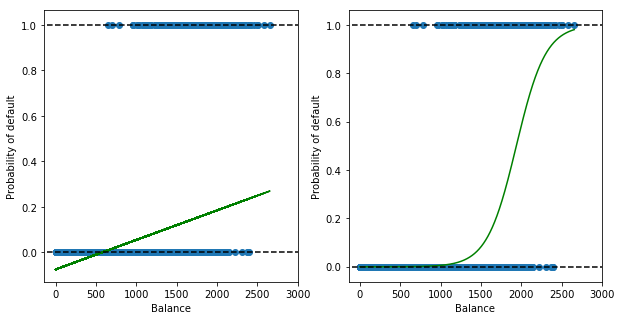

In [3]:
#linear regression
regr = linear_model.LinearRegression()
regr.fit(data.balance.reshape(-1,1),data.def_chg)
#logistic regression
log_org = linear_model.LogisticRegression(solver='newton-cg')
log_org.fit(data.balance.reshape(-1,1),data.def_chg)
x_array = np.arange(data.balance.min(),data.balance.max())

plt.figure(figsize=(10,5))

#left
plt.subplot(121)
plt.scatter(data.balance,data.def_chg)
plt.plot(data.balance,regr.predict(data.balance.reshape(-1,1)),color = 'g')
plt.plot([-100,3000],[0,0],linestyle = 'dashed', color = 'k')
plt.plot([-100,3000],[1,1],linestyle = 'dashed', color = 'k')
plt.xlim([-140,3000])
plt.xlabel('Balance')
plt.ylabel('Probability of default')

#right
plt.subplot(122)
plt.scatter(data.balance,data.def_chg)
plt.plot(x_array, log_org.predict_proba(x_array.reshape(-1,1))[:,1], color = 'g')
plt.plot([-100,3000],[0,0],linestyle = 'dashed', color = 'k')
plt.plot([-100,3000],[1,1],linestyle = 'dashed', color = 'k')
plt.xlim([-140,3000])
plt.xlabel('Balance')
plt.ylabel('Probability of default')

In [4]:
print('B0, B1 for linear: ', regr.intercept_, regr.coef_[0])
print('B0, B1 for logistic: ', log_org.intercept_[0], log_org.coef_[0][0])

B0, B1 for linear:  -0.0751919588462 0.000129872181597
B0, B1 for logistic:  -10.6513260597 0.00549891419188


### Part 3: Simple Linear Regression

1. Make sure you understand all the components of the SLR model Jim showed in class and code the same thing yourself 

2. Generate a separate set of training data (25 points) and validation data (15 poins).  Each data set should have the same amount of irreducible error (random noise term) applied to it

3. Make a plot of the error in the testing data as a function of the random strength. There is no "one answer" for this part, open ended graded based on creativity and quality of results 

4. For the exact example I showed in class, calculate the RSE, SSR, $R^2$, 95% confidence intervals for both $\beta_i$, and evaluate the P-value at 0.05 significance level for $\beta_1$

5. Explain in plain language the meaning of the P-value test 

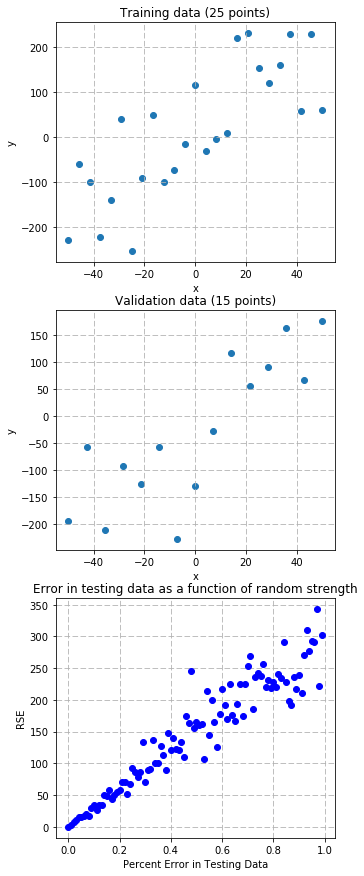

In [5]:
#model: Y = 3X + 4 
#Generate a separate set of training data (25 points) and validation data (15 poins).
pts=25
x_tra = np.linspace(-50,50,num = pts)
x_val = np.linspace(-50,50,num = 15)
B0=4
B1=3
y_act = B0 + B1*x_tra
y_val = B0 + B1*x_val
np.random.seed(123)

#add noise scaled to 25% of range to data
yrand = y_act + .25*(y_act.max()-y_act.min())*np.random.normal(size = pts)
yrand_val = y_val + .25*(y_val.max()-y_val.min())*np.random.normal(size = 15)

plt.figure(figsize=(5,15))
plt.subplot(311)
plt.scatter(x_tra,yrand)
plt.title('Training data (25 points)')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(linestyle = 'dashed')

plt.subplot(312)
plt.scatter(x_val,yrand_val)
plt.title('Validation data (15 points)')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(linestyle = 'dashed')

plt.subplot(313)
#Use a for loop to test adding different percentage strength of error
for i in range(100):
    yrand_val = y_val + (i/100)*(y_val.max()-y_val.min())*np.random.normal(size = 15)
#calculate RSE
    plt.plot(i/100,math.sqrt((((y_val-yrand_val)**2).sum())/(15-2)),marker='o',color = 'b')
plt.title('Error in testing data as a function of random strength')
plt.ylabel('RSE')
plt.xlabel('Percent Error in Testing Data')
plt.grid(linestyle = 'dashed')

In [6]:
#exact example showed in class
#model: Y = 3X + 4
#size of training data and scale of random noise 
pts=25 
noisescale=.25 
x=np.linspace(-50,50,num=pts)
B0=4
B1=3
yactual=B0+B1*x
np.random.seed(123)
#add noise scaled to 25% of range to data
yrand=yactual+noisescale*(yactual.max()-yactual.min())*np.random.normal(size=pts)
#SLR
regr=linear_model.LinearRegression() 
regr.fit(x.reshape(-1,1),yrand)
print('B0, B1: ',regr.intercept_, regr.coef_[0])

ypred = regr.predict(x.reshape(-1,1))
RSS = ((yrand - ypred)**2).sum()
print('RSS =', RSS)
RSE = math.sqrt(RSS/(pts - 2))
print ('RSE =', RSE)
TSS = ((yrand - yrand.mean())**2).sum()
Rsqr = (TSS-RSS)/TSS
print ('R^2 =', Rsqr)
SE_beta0 = math.sqrt((RSE**2)*(1/pts + x.mean()/((x - x.mean())**2).sum()))
SE_beta1 = math.sqrt(RSE**2 / ((x - x.mean())**2).sum())
print('95% confidence interval for B0:',[regr.intercept_ - 2*SE_beta0, regr.intercept_ + 2*SE_beta0])
print('95% confidence interval for B1:',[regr.coef_[0] - 2*SE_beta1,regr.coef_[0] + 2*SE_beta1])
t = (regr.coef_[0] - 0)/SE_beta1
p = stats.t.sf(np.abs(t), pts-2)*2
print('p value of B1:', p)

B0, B1:  14.5077092554 3.76217657466
RSS = 191696.69278
RSE = 91.29424306329797
R^2 = 0.624965378998
95% confidence interval for B0: [-22.009987969968563, 51.025406480669815]
95% confidence interval for B1: [2.5467941456608738, 4.9775590036502413]
p value of B1: 2.57243588663e-06


* In statistics, the p-value represents the probablity of extreme value by assuming H0 is true. When p-value is smaller enough(under desired significance level, $\alpha$), extreme value has very low probablity, but it still exists. Thus, we have confidence to reject the assumption H0 is true. That is, we can state that Ha is true. In contrast, when p-value is larger than $\alpha$, we can only state that we don't have enough evidence to reject H0.
* In this case, H0 is beta1 = 0, which means 'there is no relationship between X and Y'. I got an even smaller p value than $\alpha = 0.05$, so I have confidence to reject H0 and state Ha is true, which is 'there is some relationship between X and Y'.

### Part 4: Multiple Linear Regression
1. The code below (next cell) can be plugged into the bottom of the python notebook I gave you with my W7 lecture notes - it is based on the MLSR of the harvard data. Some information: 
    * Your colleague gives you this code makes a 3x1 composite plot  
    * They were trying to look at individual effects ($X_i$) values vs. the PCE to try and understand how important the individual $\beta_i$ are  
    * This approach is clearly wrong, both in concept as well as in code execution. Offer some explanations why. 
    * In CH3 of ISL, the F-test is explained for the multiple linear regression case. Calculate the F-statistics and explain in plain language the conclusion
    * Calculate the p-values for each of the $\beta$ values

[  2.32515162e-03   2.27082708e+00  -5.33311066e+00]
-15.7723612311


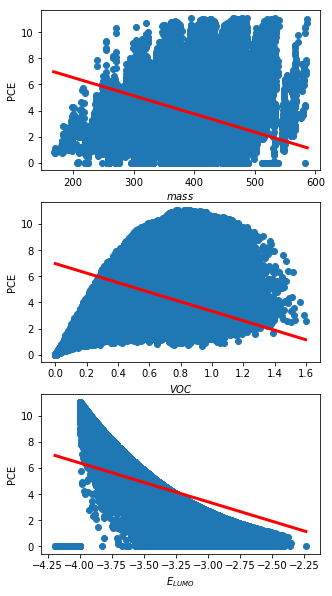

In [7]:
harvard = pd.read_csv('HCEPD_100K.csv')
regr2 = linear_model.LinearRegression()
regr2.fit(harvard[['mass','voc','e_lumo_alpha']],harvard.pce)
print(regr2.coef_)
print(regr2.intercept_)

# generate matrix X to make predictions of PCE over the X parameter space 
pts=100
X=np.zeros((pts,3))
X[:,0]=np.linspace(harvard.mass.min(),harvard.mass.max(),pts)
X[:,1]=np.linspace(harvard.voc.min(),harvard.voc.max(),pts)
X[:,2]=np.linspace(harvard.e_lumo_alpha.min(),harvard.e_lumo_alpha.max(),pts)

# plot the predicted data 
plt.figure(figsize=(5,10))

plt.subplot(311)
plt.scatter(harvard.mass,harvard.pce)
plt.plot(X[:,0],regr2.predict(X),color='red',lw=3)
plt.ylabel('PCE')
plt.xlabel('$mass$')

plt.subplot(312)
plt.scatter(harvard.voc,harvard.pce)
plt.plot(X[:,1],regr2.predict(X),color='red',lw=3)
plt.ylabel('PCE')
plt.xlabel('$VOC$')

plt.subplot(313)
plt.scatter(harvard.e_lumo_alpha,harvard.pce)
plt.plot(X[:,2],regr2.predict(X),color='red',lw=3)
plt.ylabel('PCE')
plt.xlabel('$E_{LUMO}$')

* If we do simple linear regression seperately 3 times, we can compare each $\beta_i$ like this. However, when we do multiple linear regression, which means considering all factors in one regression, $\beta_i$ in this case are affected by each other. Thus, we can't compare like this way. 

In [8]:
#TSS
TSS = 0
pce_mean = harvard.pce.mean()
for i in harvard.pce:
    TSS += (i - pce_mean)**2
print('TSS = ', TSS)

#RSS
RSS = 0
for i in range(harvard.shape[0]):
    RSS += (harvard.pce[i] - regr2.intercept_ - regr2.coef_[0]*harvard.mass[i] 
            - regr2.coef_[1]*harvard.voc[i] - regr2.coef_[2]*harvard.e_lumo_alpha[i])**2
print('RSS = ', RSS)

p = 3
n = harvard.shape[0]
F = ((TSS - RSS)/p)/(RSS/(n-p-1))
print('F-statistic = ', F)

TSS =  427481.083228
RSS =  81643.391141
F-statistic =  141191.424221


* F-statistic comes from a hypothesis test, setting the null hypothesis that all $\beta_i = 0$ except for $\beta_0$. When there is no relationship between the response and predictors, we would expect the F-statistic to take on a value close to 1. On the other hand, if Ha (at least one $\beta_i$ is non-zero) is true, we expect F to be greater than 1. In this case, F is larger than a hundred thousand, suggesting that at least one of the predictors(mass, voc, $E_{LUMO}$) must be related to PCE.

In [9]:
#beta 1
RSS0 = 0
for i in range(n):
    RSS0 += (harvard.pce[i] - regr2.intercept_ - regr2.coef_[1]*harvard.voc[i]
             - regr2.coef_[2]*harvard.e_lumo_alpha[i])**2
F = (RSS0-RSS)/(RSS/(n-p-1))
p = stats.t.sf(np.abs(F),n-2)*2
print("p value of beta1:",p,"(note: 0.0 means < 1e-6)")

#beta 2
RSS0 = 0
for i in range(n):
    RSS += (harvard.pce[i] - regr2.intercept_ - regr2.coef_[0]*harvard.mass[i] 
             - regr2.coef_[2]*harvard.e_lumo_alpha[i])**2
F = (RSS0-RSS)/(RSS/(n-p-1))
p = stats.t.sf(np.abs(F),n-2)*2
print("p value of beta2:",p,"(note: 0.0 means < 1e-6)")

#beta 3
RSS0 = 0
for i in range(n):
    RSS += (harvard.pce[i] - regr2.intercept_ - regr2.coef_[0]*harvard.mass[i] 
            - regr2.coef_[1]*harvard.voc[i])**2
F = (RSS0-RSS)/(RSS/(n-p-1))
p = stats.t.sf(np.abs(F),n-2)*2
print("p value of beta3:",p,"(note: 0.0 means < 1e-6)")

p value of beta1: 0.0 (note: 0.0 means < 1e-6)
p value of beta2: 0.0 (note: 0.0 means < 1e-6)
p value of beta3: 0.0 (note: 0.0 means < 1e-6)


### Part 5: Resampling methods 

I would like you to write a clearly labeled function that performs bootstrapping using a subset of the HCEPD_100K.csv data. Your function should be versatile in terms of how much of the data is selected for the bootstrap and and how many iterations are run.  

1. Prepare a plot of MSE (using the same 3-parameter PCE fit (using mass/VOC/lumo features). The x-axis should be the number of bootstrap samples and the y-axis should be the MSE. You should show a line for boostrap samples sizes of 100, 1000, and 5000.  
    
2. For the same sampling you should show a plot the estimate of the three relevant beta coefficients 
    

In [11]:
#Create a bootstrap sampling fuction and return average MSE and beta
def bootstrap(data, num, iter_):
    MSE_avg = 0
    B1_avg = 0
    B2_avg = 0
    B3_avg = 0
    for i in range(iter_):
        #choose randomly with replacement
        df = data.sample(num, replace = True)
        #MLR
        regr = linear_model.LinearRegression()
        regr.fit(df[['mass','voc','e_lumo_alpha']],df.pce)
        pred = regr.predict(df[['mass','voc','e_lumo_alpha']])
        #MSE and beta
        MSE = ((df.pce - pred)**2).mean()
        MSE_avg += MSE
        B1_avg += regr.coef_[0]
        B2_avg += regr.coef_[1]
        B3_avg += regr.coef_[2]
    return [MSE_avg/iter_, B1_avg/iter_, B2_avg/iter_, B3_avg/iter_]

#collect these values to plot
MSE_list = []
B1_list = []
B2_list = []
B3_list = []
for i in range(1,51):
    MSE_sublist = []
    B1_sublist = []
    B2_sublist = []
    B3_sublist = []
    for j in [100,1000,5000]:
        bst = bootstrap(harvard, j, i)
        MSE_sublist.append(bst[0])
        B1_sublist.append(bst[1])
        B2_sublist.append(bst[2])
        B3_sublist.append(bst[3])
    MSE_list.append(MSE_sublist)
    B1_list.append(B1_sublist)
    B2_list.append(B2_sublist)
    B3_list.append(B3_sublist)

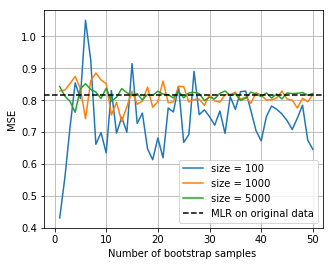

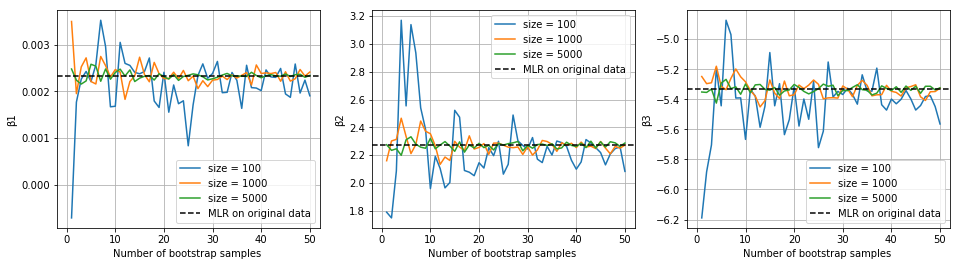

In [12]:
#MLR on original data set
x = range(1,51)
regr = linear_model.LinearRegression()
regr.fit(harvard[['mass','voc','e_lumo_alpha']],harvard.pce)
pred = regr.predict(harvard[['mass','voc','e_lumo_alpha']])
MSE = ((harvard.pce - pred)**2).mean()

#MSE
plt.figure(figsize=(5,4))
plt.subplot(111)
plt.plot(x, np.asarray(MSE_list)[:,0], label='size = 100')
plt.plot(x, np.asarray(MSE_list)[:,1], label='size = 1000')
plt.plot(x, np.asarray(MSE_list)[:,2], label='size = 5000')
plt.plot([-2,52],[MSE, MSE],color = 'k', linestyle = 'dashed', label='MLR on original data')
plt.xlim([-2,52])
plt.xlabel('Number of bootstrap samples ')
plt.ylabel('MSE')
plt.legend()
plt.grid()

#beta1
plt.figure(figsize=(16,4))
plt.subplot(131)
plt.plot(x, np.asarray(B1_list)[:,0], label='size = 100')
plt.plot(x, np.asarray(B1_list)[:,1], label='size = 1000')
plt.plot(x, np.asarray(B1_list)[:,2], label='size = 5000')
plt.plot([-2,52],[regr.coef_[0],regr.coef_[0]],color = 'k', linestyle = 'dashed', label='MLR on original data')
plt.xlim([-2,52])
plt.ylabel(chr(946)+'1')
plt.xlabel('Number of bootstrap samples ')
plt.legend()
plt.grid()

#beta2
plt.subplot(132)
plt.plot(x, np.asarray(B2_list)[:,0], label='size = 100')
plt.plot(x, np.asarray(B2_list)[:,1], label='size = 1000')
plt.plot(x, np.asarray(B2_list)[:,2], label='size = 5000')
plt.plot([-2,52],[regr.coef_[1],regr.coef_[1]],color = 'k', linestyle = 'dashed', label='MLR on original data')
plt.xlim([-2,52])
plt.ylabel(chr(946)+'2')
plt.xlabel('Number of bootstrap samples ')
plt.legend()
plt.grid()

#beta3
plt.subplot(133)
plt.plot(x, np.asarray(B3_list)[:,0], label='size = 100')
plt.plot(x, np.asarray(B3_list)[:,1], label='size = 1000')
plt.plot(x, np.asarray(B3_list)[:,2], label='size = 5000')
plt.plot([-2,52],[regr.coef_[2],regr.coef_[2]],color = 'k', linestyle = 'dashed', label='MLR on original data')
plt.xlim([-2,52])
plt.ylabel(chr(946)+'3')
plt.xlabel('Number of bootstrap samples ')
plt.legend()
plt.grid()